##**비지도학습**

##**6-1, 군집 알고리즘**

In [ ]:
# 비지도 학습
# 6-1, 군집 알고리즘
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-05-21 00:54:15--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-05-21 00:54:15--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-05-21 00:54:16--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')

In [ ]:
print(fruits.shape) # 300장 사진, 100행, 100열 (100x100)
"""
평소 이미지 ex) 1920x1080 가로x세로 (너비x높이)
넘파이 배열 이미지 ex) 100x100 행x열 => 세로x가로 (높이x너비)
평소 이미지랑 값이 다름!!
"""

(300, 100, 100)


'\n평소 이미지 ex) 1920x1080 가로x세로 (너비x높이)\n넘파이 배열 이미지 ex) 100x100 행x열 => 세로x가로 (높이x너비)\n평소 이미지랑 값이 다름!!\n'

In [ ]:
print(fruits[0, 0, :]) # 0번째 사진, 0행, 모든 열

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


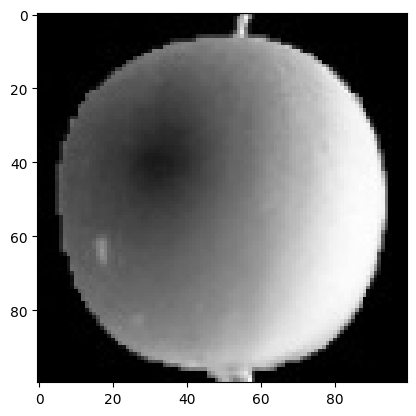

In [ ]:
plt.imshow(fruits[0], cmap='gray')
"""
머신러닝에서 컴퓨터는 이미지를 분석할때 밝은 부분을 주로 학습함.
그래서 이미지의 배경과 사물을 반전시켜서 사물을 원활하게 학습시킴.
반전 안시킨 이미지 (배경이 흰색)일때는 학습결과가 바람직하지 못함.
rgb(255,255,255) 값이 높을수록 밝은색임.
"""
plt.show()

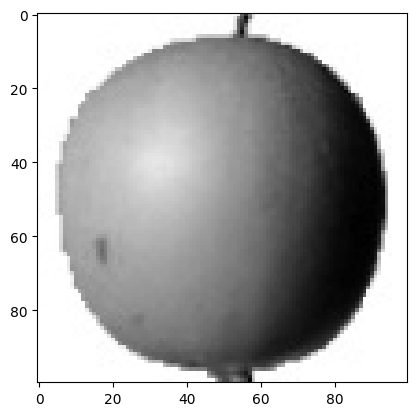

In [ ]:
plt.imshow(fruits[0], cmap='gray_r')
# 사람의 눈으로 볼때는 gray_r 명령어를 사용하면 기존 이미지 볼 수 있음.
plt.show()

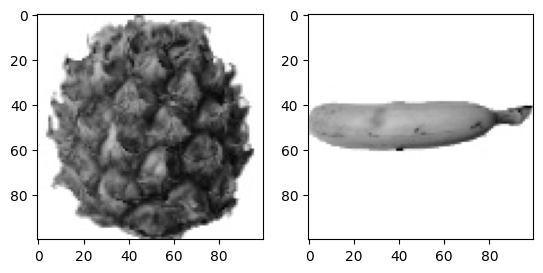

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [ ]:
# 픽셀 값 분석하기

apple = fruits[0:100].reshape(-1, 100*100) # -1은 자동 계산
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

print(apple.shape)

(100, 10000)


In [ ]:
print(apple.mean(axis=1)) # axis 값이 0이면 열, 1이면 행

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


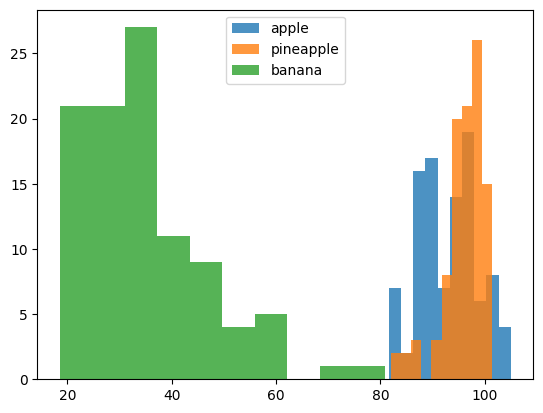

In [ ]:
plt.hist(np.mean(apple, axis=1), alpha=0.8) # alpha 는 투명도 0이면 안보임 1이면 불투명(기본값)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

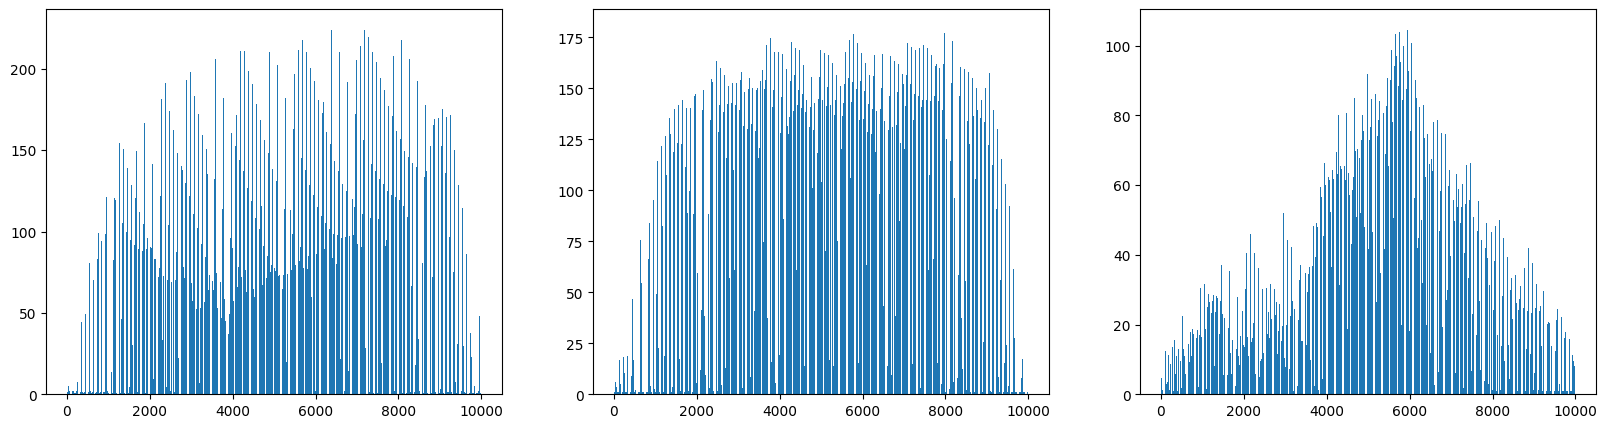

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (20, 5)) # 1행 3열 그래프, 즉 그래프 3개

axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))

plt.show()

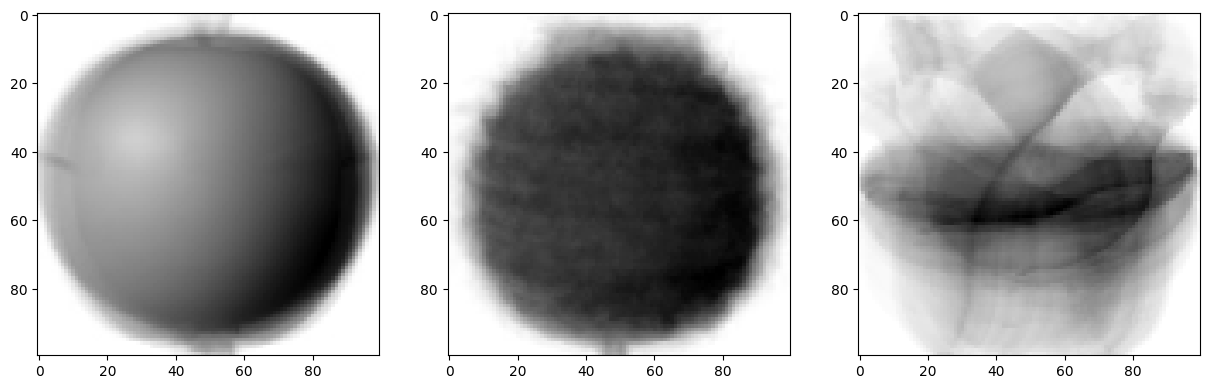

In [ ]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# subplot의 값에따라 axs[][] 2차원으로 표현해야되는 경우가 있음.

axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')

plt.show()

In [ ]:
# 평균값과 가까운 사진 고르기
abs_diff = np.abs(fruits - apple_mean) #np.abs는 절대값 반환
"""
브로드캐스팅 규칙
NumPy의 브로드캐스팅 규칙에 따라,
두 배열의 차원이 다를 때 연산이 가능한 조건은 다음과 같습니다:

1. 두 배열의 각 차원에서,
하나의 배열이 1인 차원은 다른 배열의 해당 차원에 맞춰질 수 있습니다.

2. 두 배열의 차원이 동일하거나, 그렇지 않은 경우에도
하나의 배열의 해당 차원이 1이면 다른 배열의 해당 차원에 맞춰질 수 있습니다.

fruits 배열의 형태는 (300, 100, 100)입니다.
apple_mean 배열의 형태는 (100, 100)입니다.
브로드캐스팅에 의해 apple_mean 배열은 (300, 100, 100) 형태로 확장됩니다.
즉, apple_mean이 각 이미지에 대해 반복됩니다.
"""
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


In [ ]:
"""import numpy as np
import matplotlib.pyplot as plt

# 예제 데이터 생성
fruits = np.array([[[1, 2], [3, 4]],
                   [[5, 6], [7, 8]]])  # 형태: (2, 2, 2)
apple_mean = np.array([[1, 1], [1, 1]])  # 형태: (2, 2)

# 각 이미지와 apple_mean 이미지의 차이의 절대값 계산
abs_diff = np.abs(fruits - apple_mean)

# 차이의 절대값의 평균 계산
abs_mean = np.mean(abs_diff, axis=(1, 2))

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# 원본 이미지
axes[0, 0].imshow(fruits[0], cmap='gray')
axes[0, 0].set_title("Original Image 1")

axes[1, 0].imshow(fruits[1], cmap='gray')
axes[1, 0].set_title("Original Image 2")

# apple_mean 이미지
axes[0, 1].imshow(apple_mean, cmap='gray')
axes[0, 1].set_title("Apple Mean Image")
axes[1, 1].imshow(apple_mean, cmap='gray')
axes[1, 1].set_title("Apple Mean Image")

# 절대 차이 이미지
axes[0, 2].imshow(abs_diff[0], cmap='hot')
axes[0, 2].set_title("Absolute Difference 1")

axes[1, 2].imshow(abs_diff[1], cmap='hot')
axes[1, 2].set_title("Absolute Difference 2")

# 평균 절대 차이 값 출력
print("Mean Absolute Difference:")
for i in range(len(abs_mean)):
    print(f"Image {i+1}: {abs_mean[i]}")

plt.tight_layout()
plt.show()
"""

'import numpy as np\nimport matplotlib.pyplot as plt\n\n# 예제 데이터 생성\nfruits = np.array([[[1, 2], [3, 4]],\n                   [[5, 6], [7, 8]]])  # 형태: (2, 2, 2)\napple_mean = np.array([[1, 1], [1, 1]])  # 형태: (2, 2)\n\n# 각 이미지와 apple_mean 이미지의 차이의 절대값 계산\nabs_diff = np.abs(fruits - apple_mean)\n\n# 차이의 절대값의 평균 계산\nabs_mean = np.mean(abs_diff, axis=(1, 2))\n\n# 시각화\nfig, axes = plt.subplots(2, 3, figsize=(12, 6))\n\n# 원본 이미지\naxes[0, 0].imshow(fruits[0], cmap=\'gray\')\naxes[0, 0].set_title("Original Image 1")\n\naxes[1, 0].imshow(fruits[1], cmap=\'gray\')\naxes[1, 0].set_title("Original Image 2")\n\n# apple_mean 이미지\naxes[0, 1].imshow(apple_mean, cmap=\'gray\')\naxes[0, 1].set_title("Apple Mean Image")\naxes[1, 1].imshow(apple_mean, cmap=\'gray\')\naxes[1, 1].set_title("Apple Mean Image")\n\n# 절대 차이 이미지\naxes[0, 2].imshow(abs_diff[0], cmap=\'hot\')\naxes[0, 2].set_title("Absolute Difference 1")\n\naxes[1, 2].imshow(abs_diff[1], cmap=\'hot\')\naxes[1, 2].set_title("Absolute Difference 

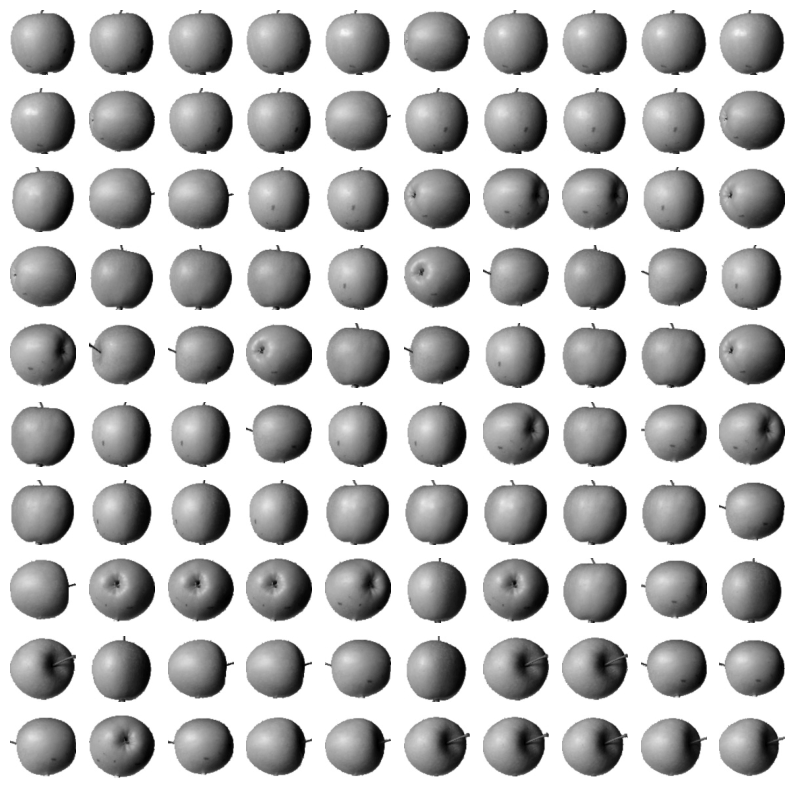

In [ ]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

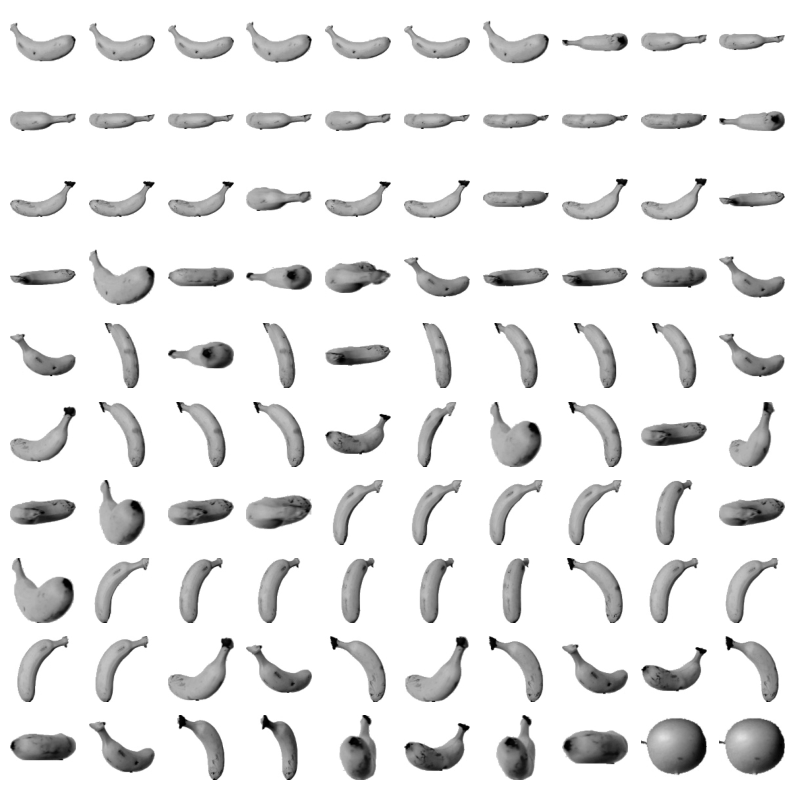

In [ ]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off') #눈금
plt.show()

##**6-2, k-평균**

In [ ]:
# 6-2, k-평균
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42) # clusters 군집점
km.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [ ]:
def draw_fruits(arr, ratio=1): # ratio는 그림크기 비율
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10 # 행이 1행이면 배열 개수만큼, 행이 2행 이상이면 10열로
    # squeeze = True를 하면 1차월 배열이 나올 수도 있는데, 코드 일관성을 위해 False
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

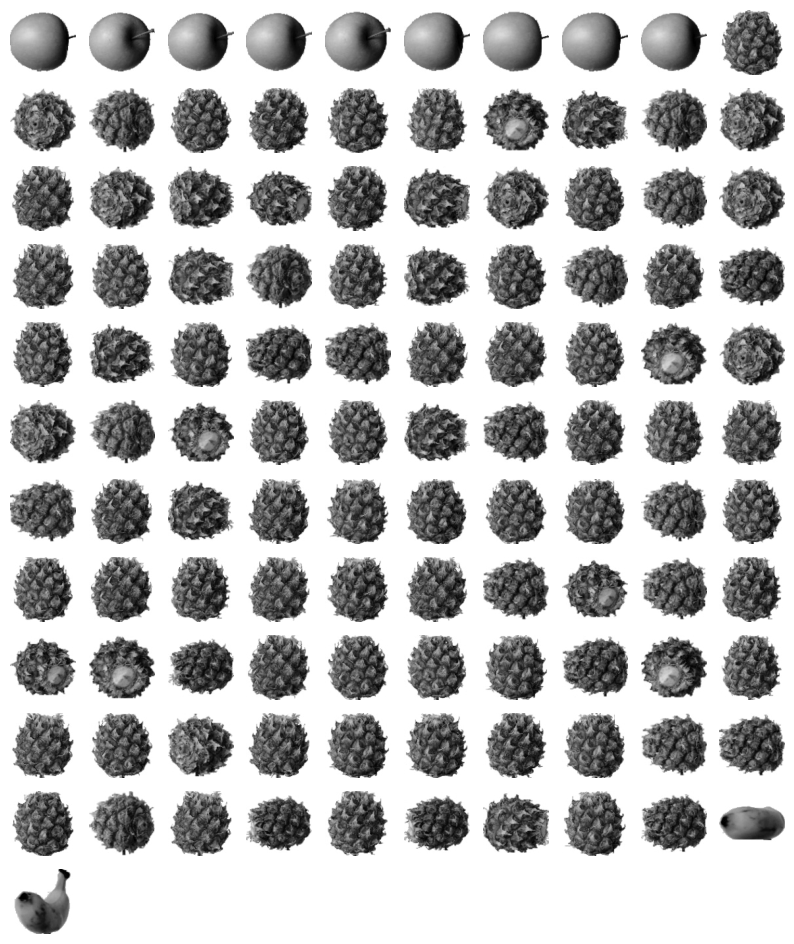

In [ ]:
draw_fruits(fruits[km.labels_==0])

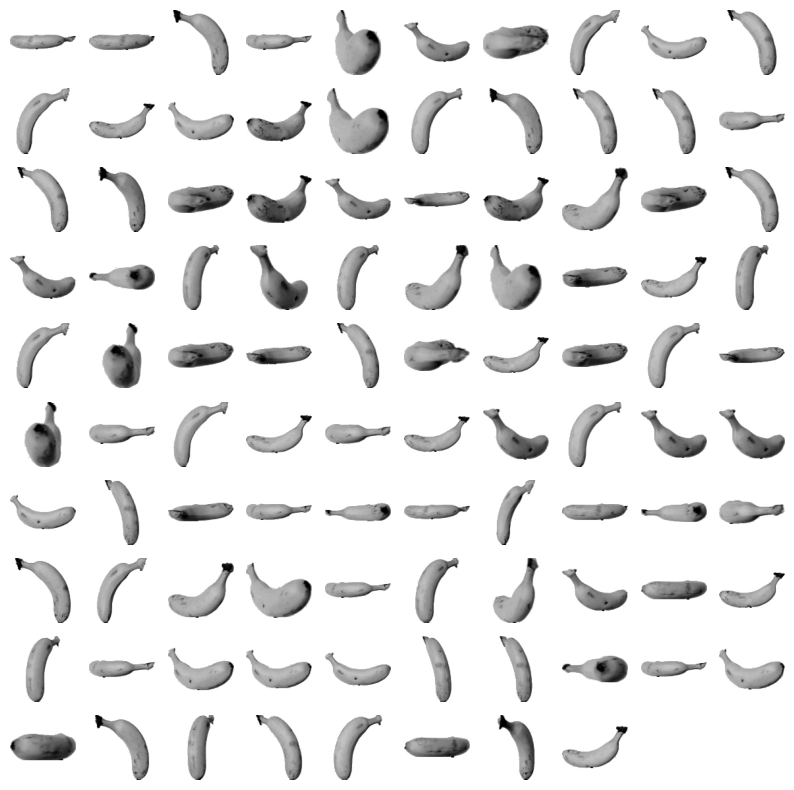

In [ ]:
draw_fruits(fruits[km.labels_==1])

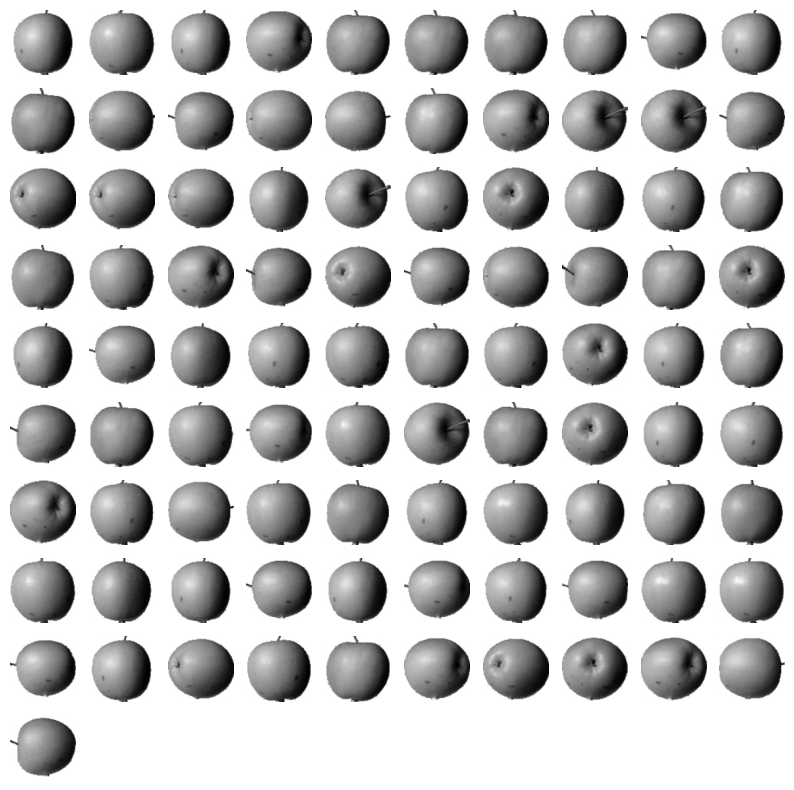

In [ ]:
draw_fruits(fruits[km.labels_==2])

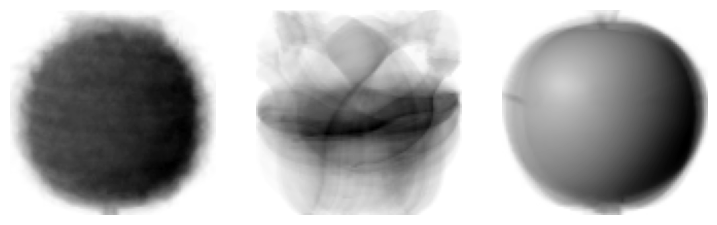

In [ ]:
# 클러스터 중심
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

[[3393.8136117  8837.37750892 5267.70439881]]
[0]


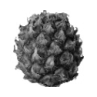

4


In [ ]:
print(km.transform(fruits_2d[100:101]))
# transform: 주어진 샘플과 중심점 간의 거리 정보를 출력 (2차원 줘야함)

print(km.predict(fruits_2d[100:101]))

draw_fruits(fruits[100:101])

print(km.n_iter_) # 문제 해결을 위해 중심점 몇번 계산(작동) 했는지

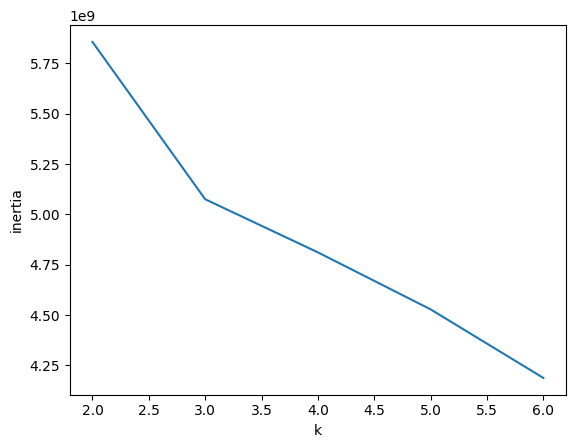

In [ ]:
# 최적의 k 찾기

inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# k 값이 3에 근접할 때, 엘보우 포인트 (최적값)이 형성됨.

##**6-3, PCA 클래스**

In [ ]:
# 6-3, PCA 클래스
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) #차원의 개수를 지정함.
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape)

(50, 10000)


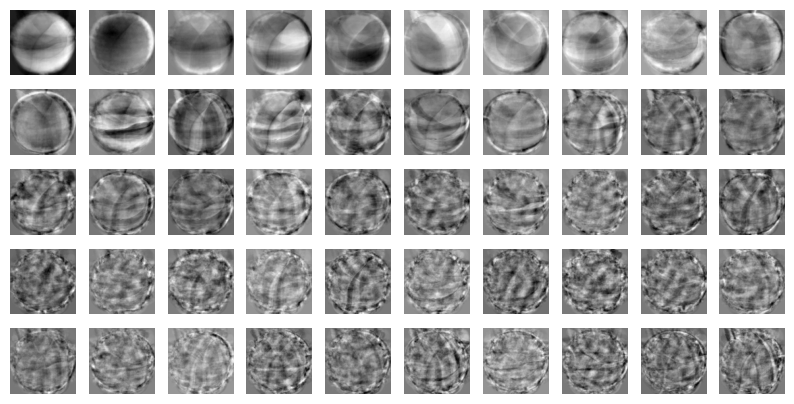

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)

In [ ]:
print(fruits_pca.shape)

(300, 50)


In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

In [ ]:
# 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

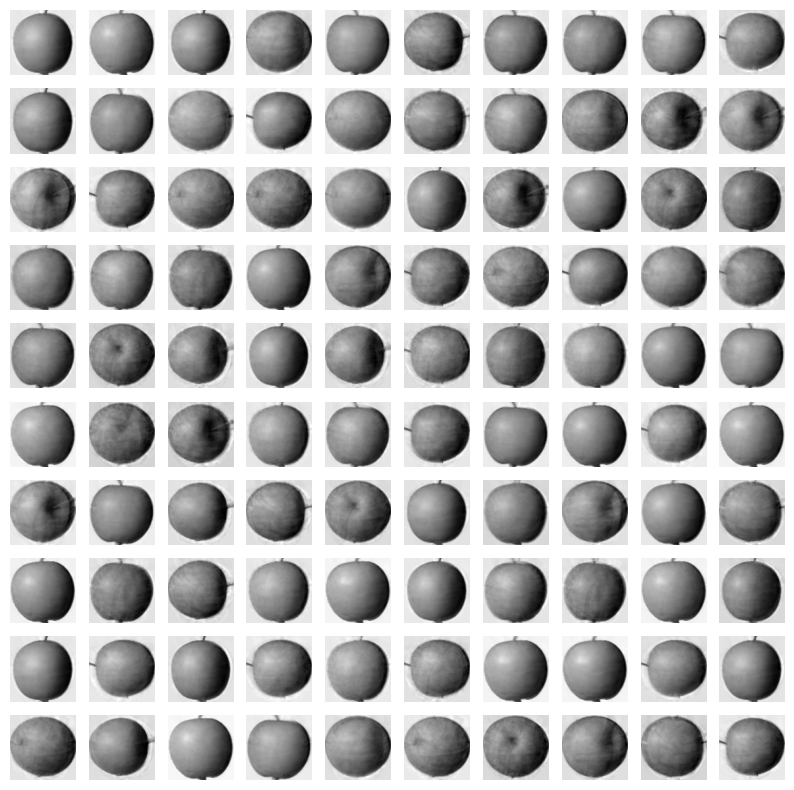

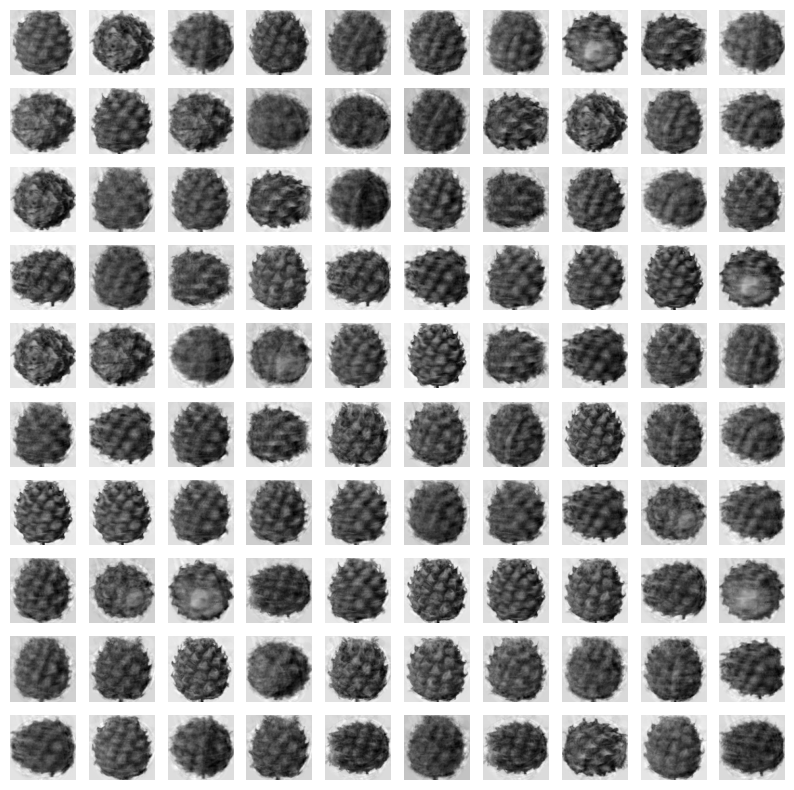

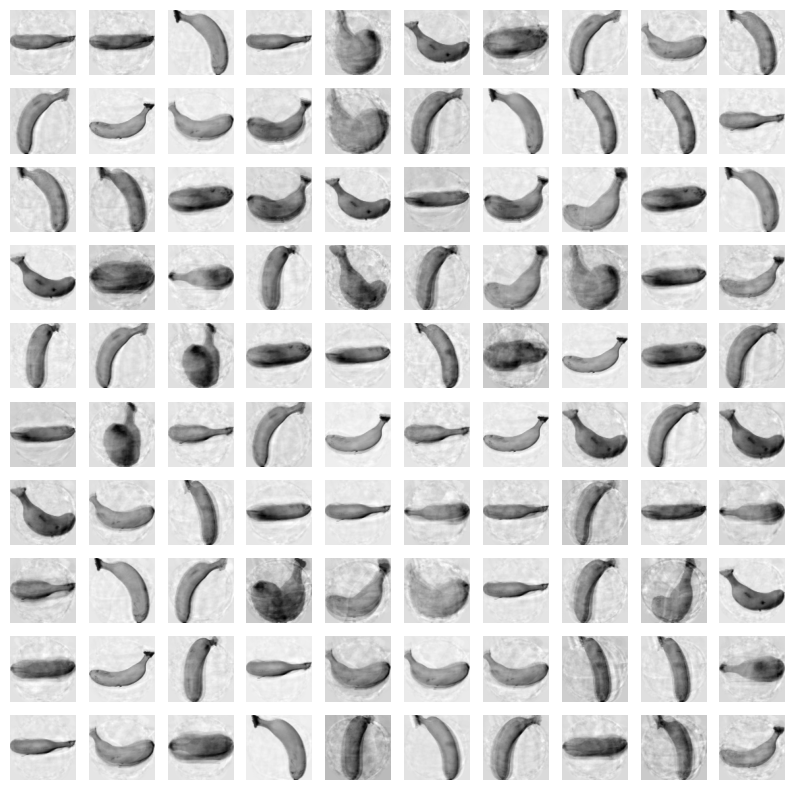

In [ ]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215166363334631


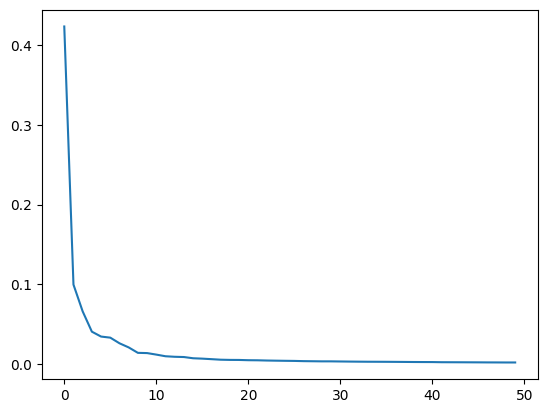

In [ ]:
plt.plot(pca.explained_variance_ratio_)
# 아래 그래프에서는 10이 넘어가는 시점에선 유의미한 결과가 되기 힘듬

In [ ]:
# 다른 알고리즘과 함께 사용하기
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
from sklearn.model_selection import cross_validate # 교차검증

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
3.010675811767578


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03726015090942383


In [ ]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
print(pca.n_components_)

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9933333333333334
0.05170321464538574


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.cluster import KMeans #군집화

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


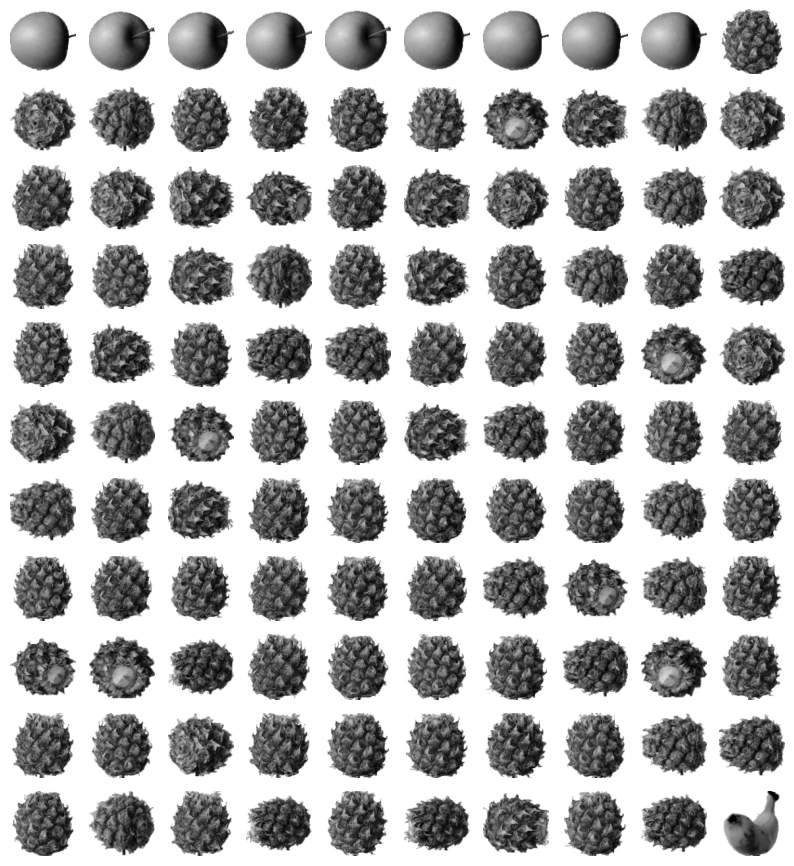

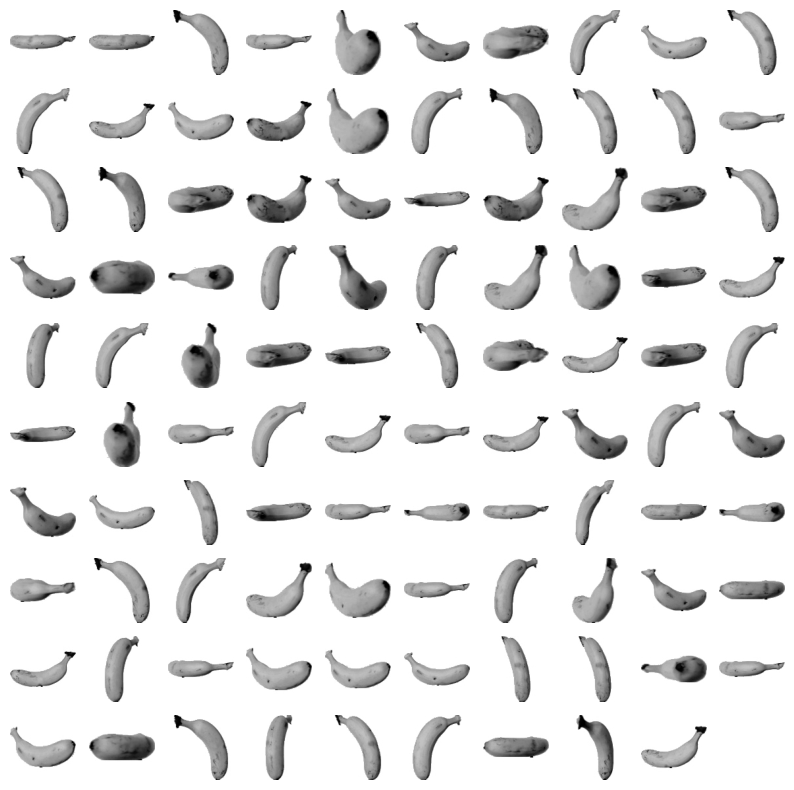

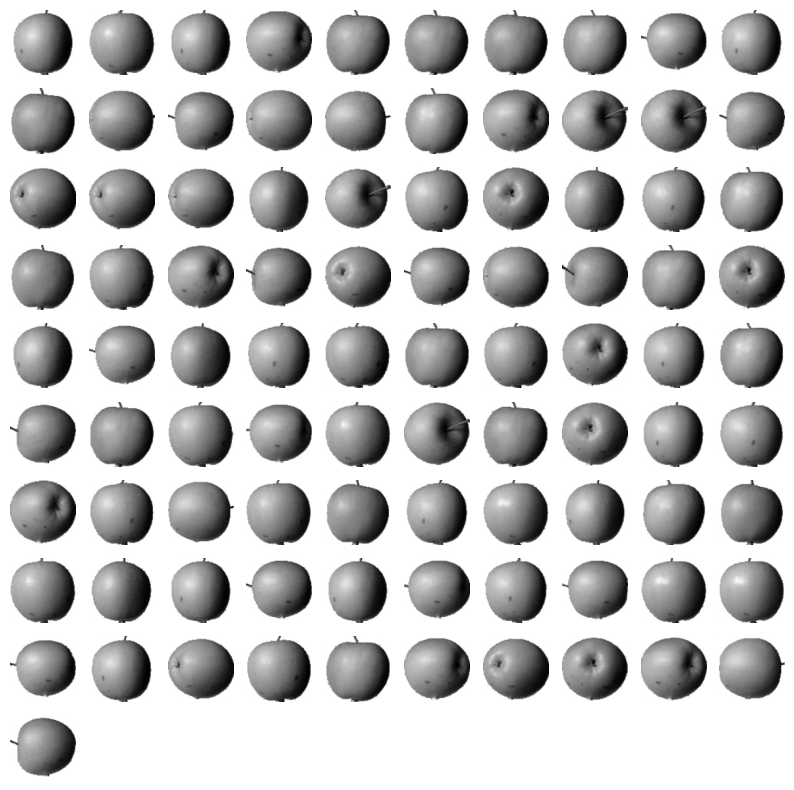

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

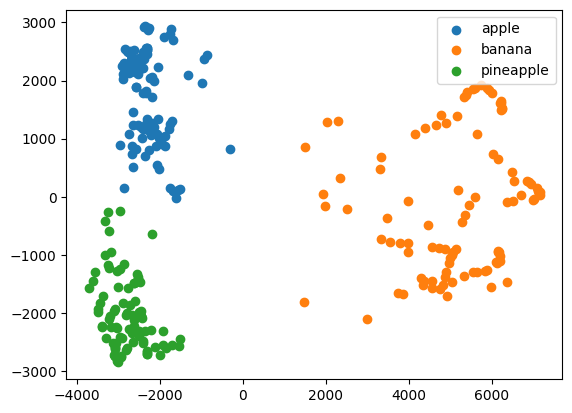

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()
# 군집화의 시각화